# Plot covariance matrix of financial time series (FTS)

In [1]:
import re
import sys
import warnings
import numpy as np # type: ignore
import pandas as pd # type: ignore

sys.path.append('../modules')
import plot_market_factors as pmf # type: ignore

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
#pd.options.display.max_rows = 277

## Global variables

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2024-08-21"
igd = re.sub("-", "", input_generation_date)
stock_index_name = "mxx"

## Load data and filter duplicates by symbol and date

In [3]:
df_normalized = pd.read_csv(
    "{}/df_{}_rolling_window_{}.csv".format(output_path, stock_index_name, igd),
    low_memory = False
)

df_normalized_eigenvalues = pd.read_csv(
    "{}/df_{}_eigenvalues_evolution_{}.csv".format(output_path, stock_index_name, igd),
    low_memory = False
)

df_residuals = pd.read_csv(
    "{}/df_{}_rolling_window_residuals_{}.csv".format(output_path, stock_index_name, igd),
    low_memory = False
)

df_residuals_eigenvalues = pd.read_csv(
    "{}/df_{}_eigenvalues_evolution_residuals_{}.csv".format(output_path, stock_index_name, igd),
    low_memory = False
)

# Transform dates
df_normalized["final_date"] = pd.to_datetime(df_normalized["final_date"], errors = "coerce")
df_residuals["final_date"] = pd.to_datetime(df_residuals["final_date"], errors = "coerce")
df_normalized_eigenvalues["final_date"] = pd.to_datetime(df_normalized_eigenvalues["final_date"], errors = "coerce")
df_residuals_eigenvalues["final_date"] = pd.to_datetime(df_residuals_eigenvalues["final_date"], errors = "coerce")

# Extract eigenvalues rank for covariance and entropy matrices (minimum and maximum per date)
cols_market_id = ["market_ticker", "final_date"]

df_normalized_eigenvalues["eigenvalues_cov_min"] = (
    df_normalized_eigenvalues.groupby(cols_market_id)["eigenvalues_cov"].transform("min")
)
df_normalized_eigenvalues["eigenvalues_cov_max"] = (
    df_normalized_eigenvalues.groupby(cols_market_id)["eigenvalues_cov"].transform("max")
)
df_normalized_eigenvalues["eigenvalues_entropy_min"] = (
    df_normalized_eigenvalues.groupby(cols_market_id)["eigenvalues_entropy"].transform("min")
)
df_normalized_eigenvalues["eigenvalues_entropy_max"] = (
    df_normalized_eigenvalues.groupby(cols_market_id)["eigenvalues_entropy"].transform("max")
)

df_residuals_eigenvalues["eigenvalues_cov_min"] = (
    df_residuals_eigenvalues.groupby(cols_market_id)["eigenvalues_cov"].transform("min")
)
df_residuals_eigenvalues["eigenvalues_cov_max"] = (
    df_residuals_eigenvalues.groupby(cols_market_id)["eigenvalues_cov"].transform("max")
)
df_residuals_eigenvalues["eigenvalues_entropy_min"] = (
    df_residuals_eigenvalues.groupby(cols_market_id)["eigenvalues_entropy"].transform("min")
)
df_residuals_eigenvalues["eigenvalues_entropy_max"] = (
    df_residuals_eigenvalues.groupby(cols_market_id)["eigenvalues_entropy"].transform("max")
)

# Reset Eigenvalues ID
df_normalized_eigenvalues["eigenvalues_id"] = (
    df_normalized_eigenvalues.groupby(cols_market_id)["eigenvalues_id"].transform("max") -
    df_normalized_eigenvalues["eigenvalues_id"] + 1
)

df_residuals_eigenvalues["eigenvalues_id"] = (
    df_residuals_eigenvalues.groupby(cols_market_id)["eigenvalues_id"].transform("max") -
    df_residuals_eigenvalues["eigenvalues_id"] + 1
)

# Get the maximum number of components per date for covariance and entropy (Marchenko-Pastur law)
cols_n_components = ["market_ticker", "final_date", "n_components_cov_mp", "n_components_entropy_mp"]
df_normalized_eigenvalues = df_normalized_eigenvalues.merge(
    right = df_normalized[cols_n_components].drop_duplicates(),
    on = cols_market_id,
    how = "left"
)
df_residuals_eigenvalues = df_residuals_eigenvalues.merge(
    right = df_residuals[cols_n_components].drop_duplicates(),
    on = cols_market_id,
    how = "left"
)

## Plot eigenvalues evolution

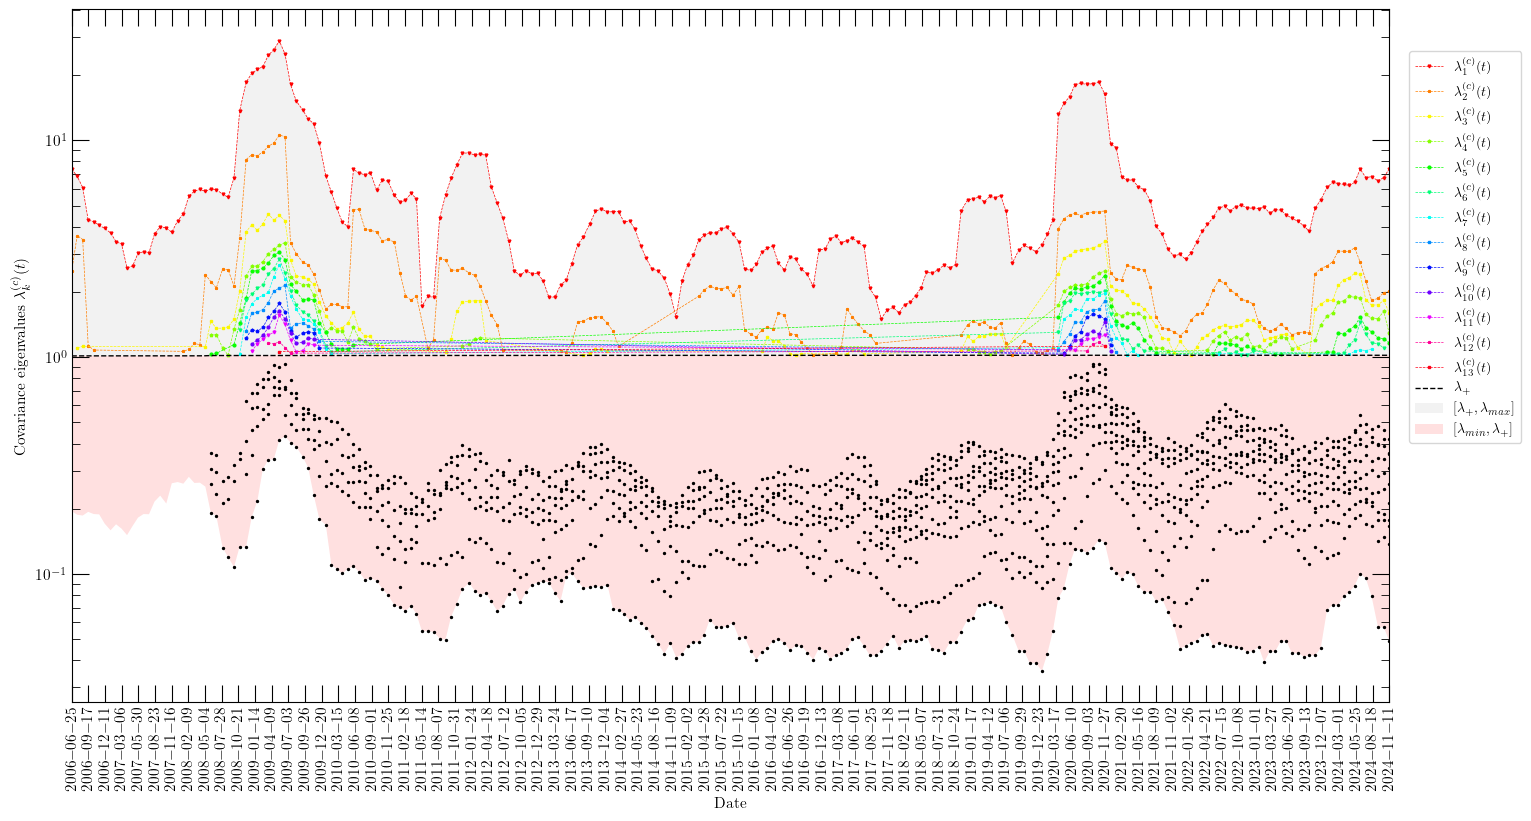

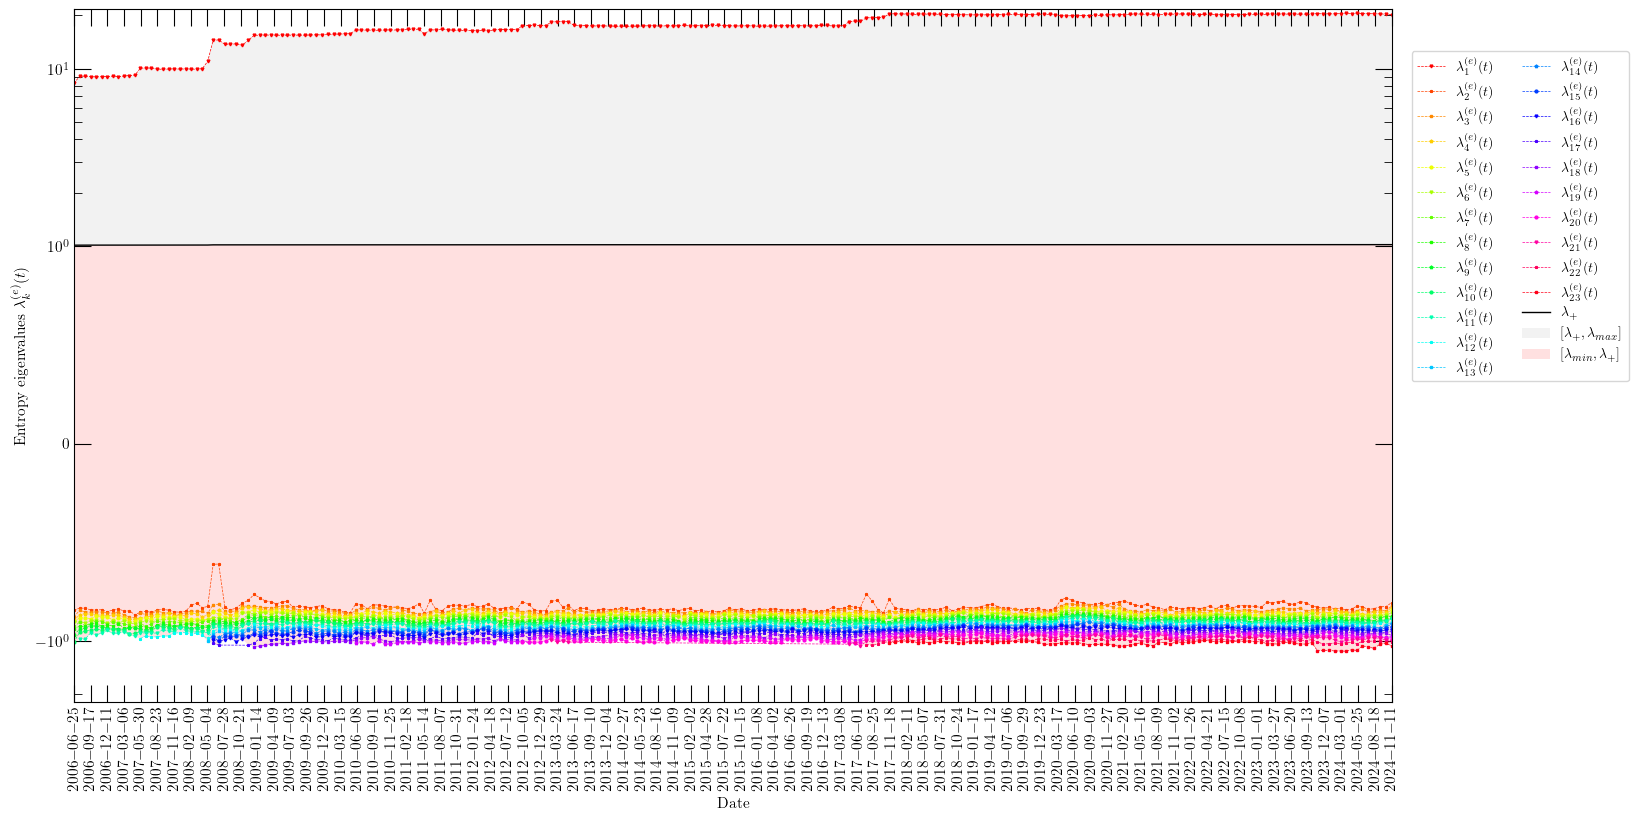

0

In [4]:
pmf.plot_eigen_evolution(
    df_eigenvalues = df_normalized_eigenvalues,
    width = 17,
    height = 9,
    fontsize_labels = 11,
    fontsize_legend = 10,
    n_cols_1 = 1,
    n_cols_2 = 2,
    n_x_breaks = 80,
    fancy_legend = True,
    x_legend = 1.01,
    y_legend = 0.95,
    usetex = True,
    dpi = 400,
    save_figures = True,
    output_path = output_path,
    information_name = "{}_eigen_evolution".format(stock_index_name),
    input_generation_date = input_generation_date
)

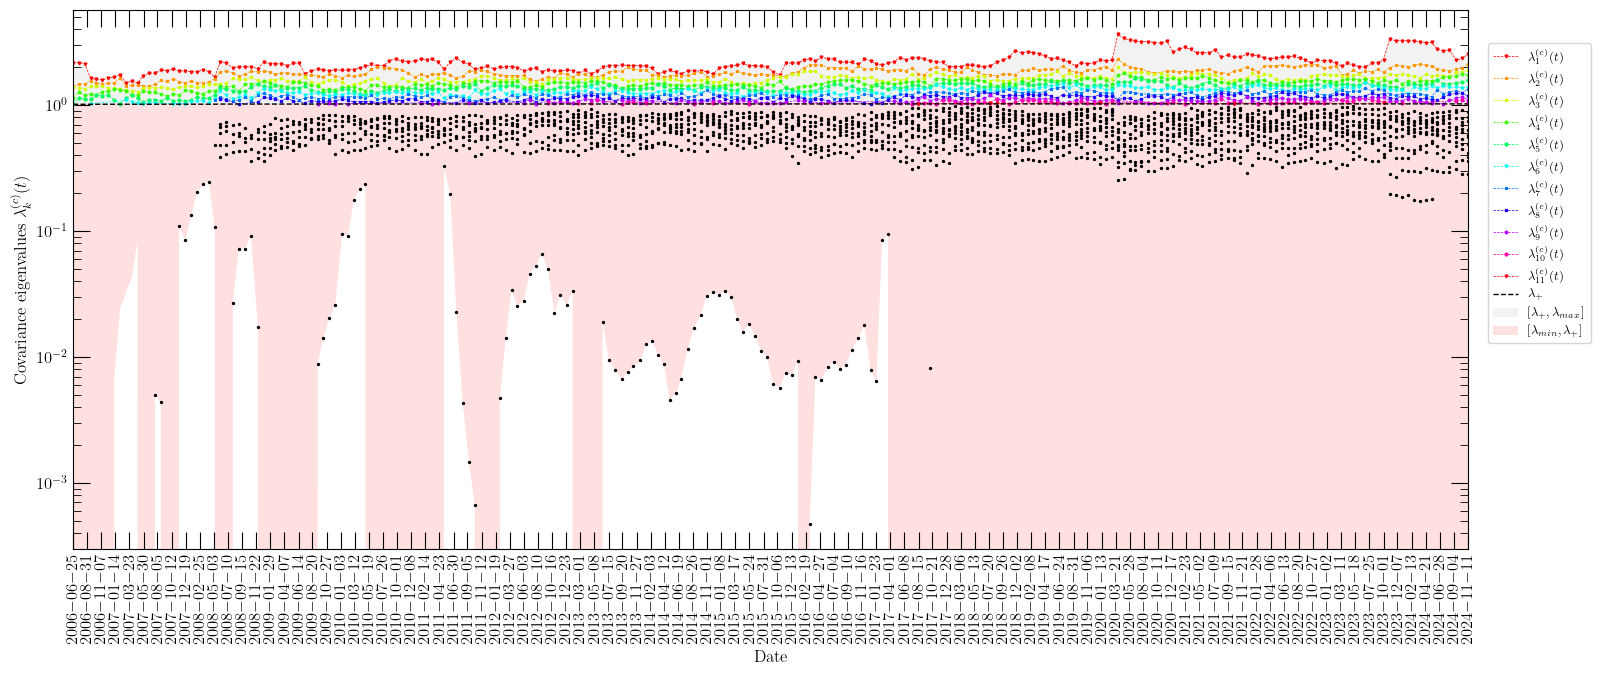

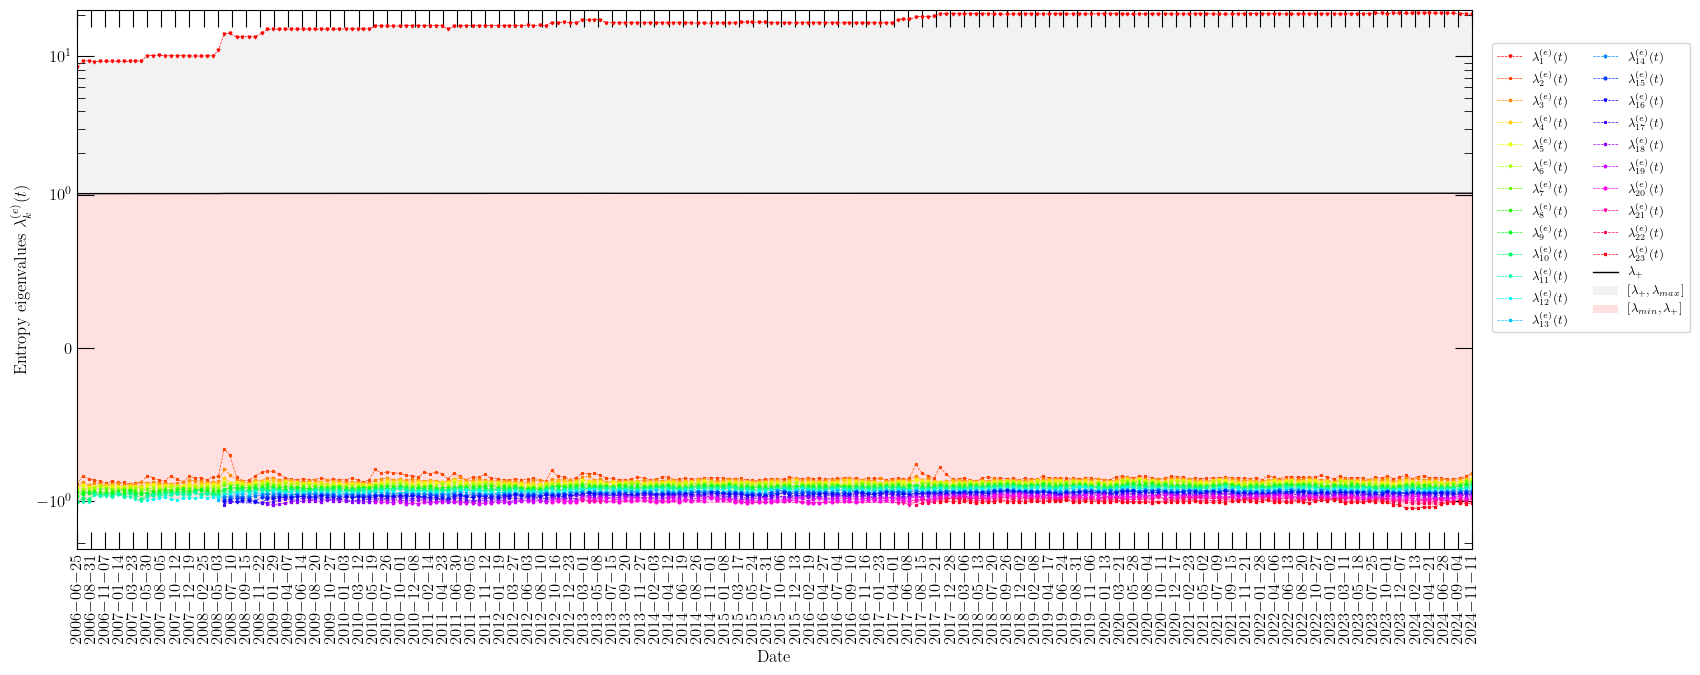

0

In [5]:
pmf.plot_eigen_evolution(
    df_eigenvalues = df_residuals_eigenvalues,
    width = 18,
    height = 7,
    fontsize_labels = 12,
    fontsize_legend = 9,
    n_cols_1 = 1,
    n_cols_2 = 2,
    n_x_breaks = 100,
    fancy_legend = True,
    x_legend = 1.01,
    y_legend = 0.95,
    usetex = True,
    dpi = 400,
    save_figures = True,
    output_path = output_path,
    information_name = "{}_eigen_evolution_residuals".format(stock_index_name),
    input_generation_date = input_generation_date
)

## Plot number of factors

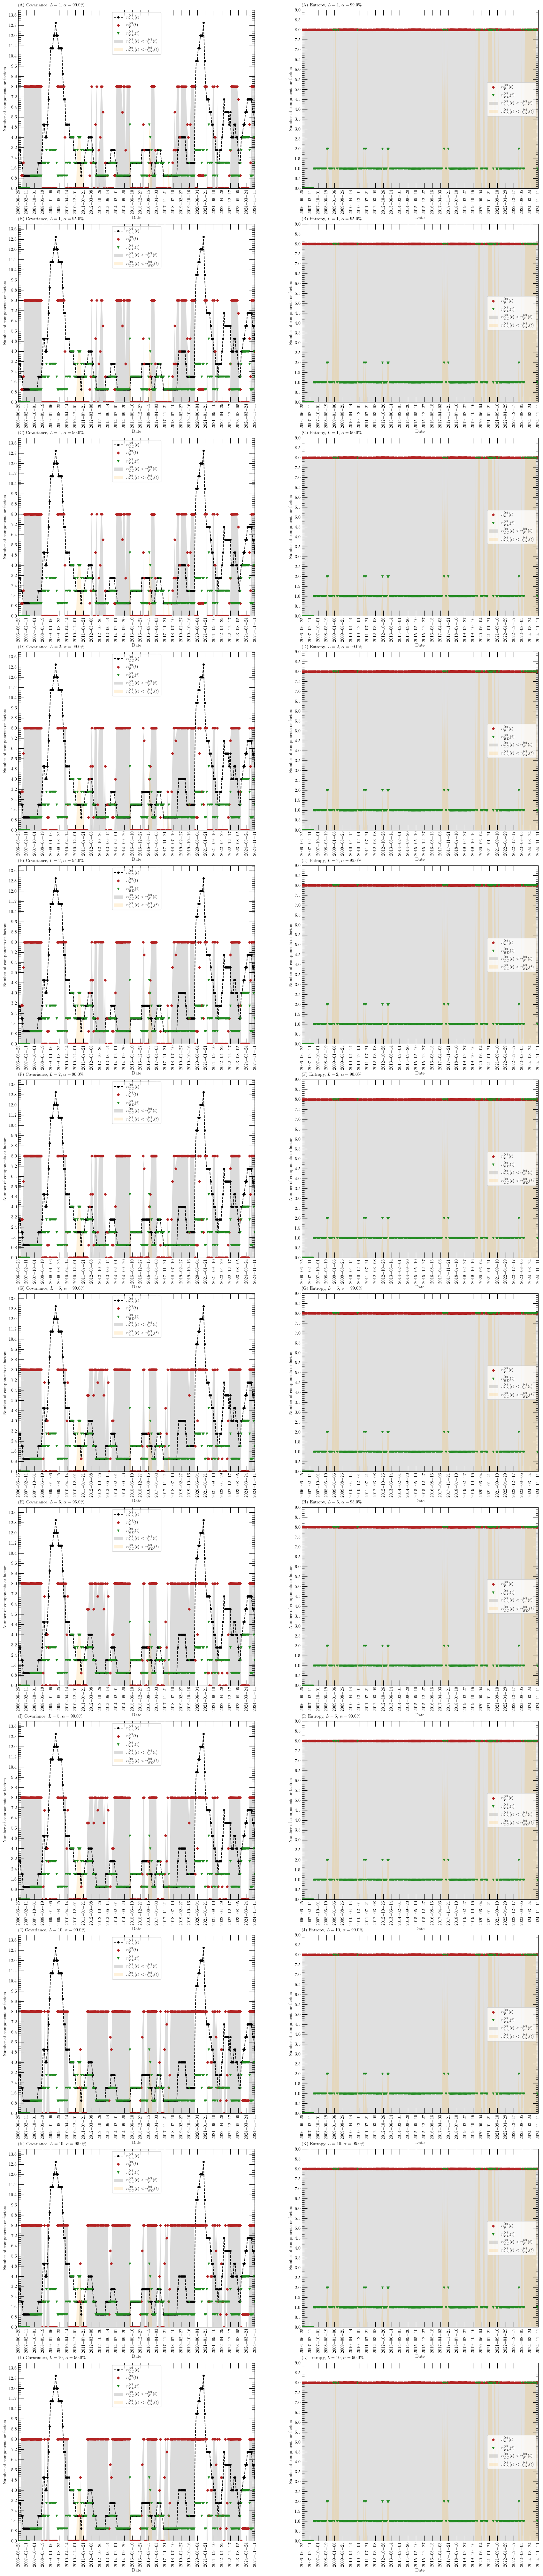

0

In [6]:
pmf.plot_market_efficiency(
    df = df_normalized,
    width = 21,
    height = 103,
    fontsize_labels = 10,
    fontsize_legend = 10,
    n_cols = 1,
    marker_size = 4,
    n_x_breaks = 30,
    n_y_breaks = 20,
    fancy_legend = True,
    usetex = True,
    dpi = 300,
    save_figures = True,
    output_path = output_path,
    information_name = "{}".format(stock_index_name),
    input_generation_date = input_generation_date
)

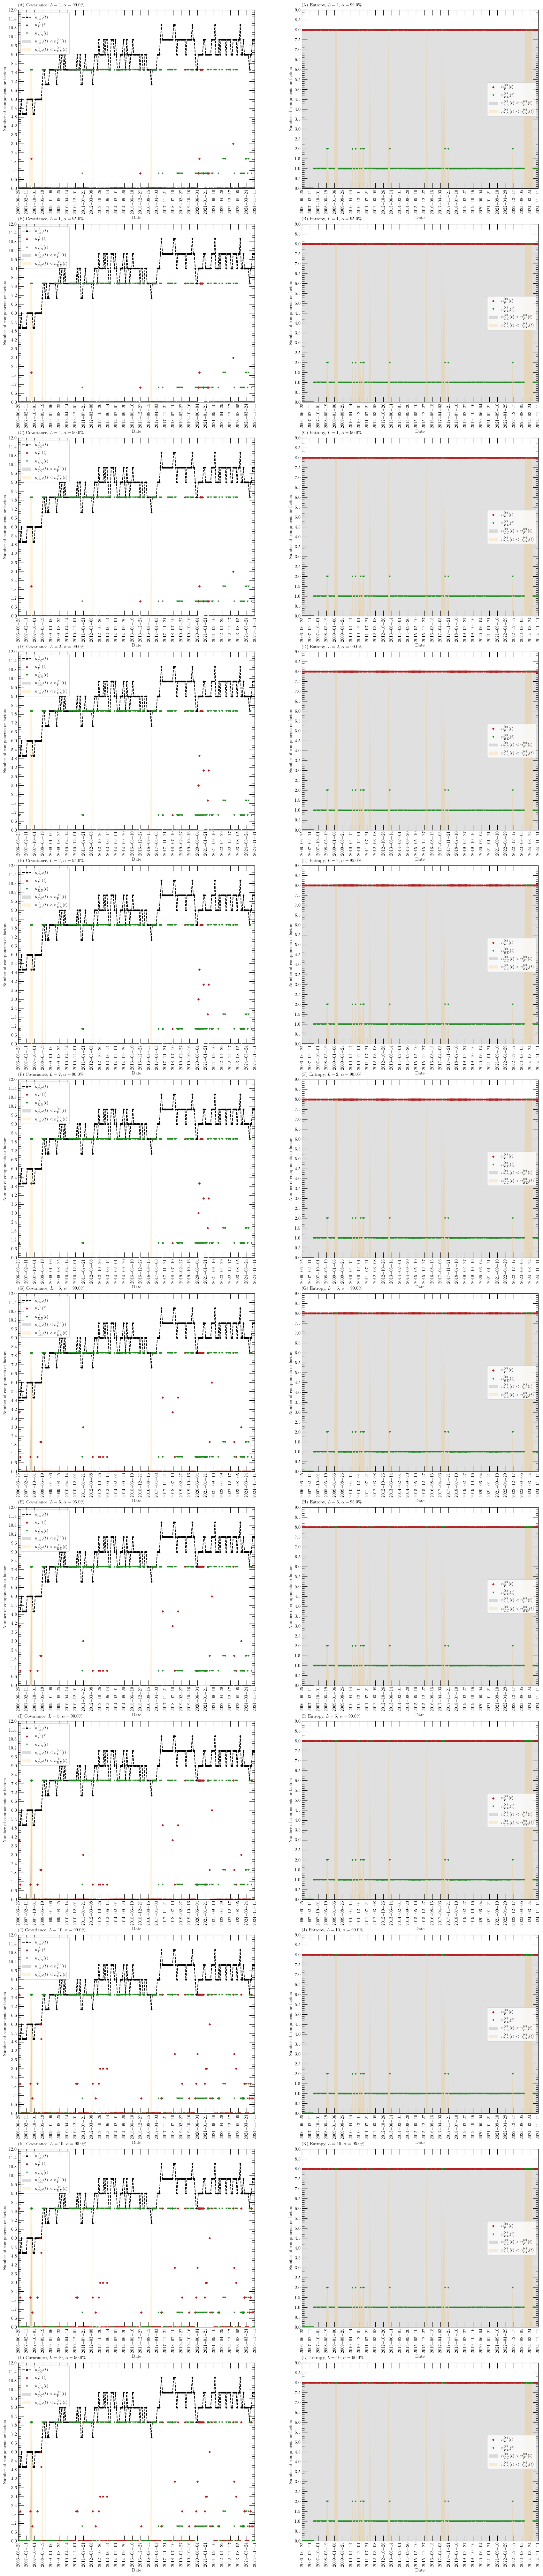

0

In [7]:
pmf.plot_market_efficiency(
    df = df_residuals,
    width = 21,
    height = 103,
    fontsize_labels = 10,
    fontsize_legend = 10,
    n_cols = 1,
    marker_size = 3,
    n_x_breaks = 30,
    n_y_breaks = 20,
    fancy_legend = True,
    usetex = True,
    dpi = 300,
    save_figures = True,
    output_path = output_path,
    information_name = "{}_residuals".format(stock_index_name),
    input_generation_date = input_generation_date
)